# Benchmark Results
This notebook visualizes the output from the different models on different classification problems

In [1]:
import glob

import pandas as pd
from plotnine import *

## Sepsis classification

In [2]:
in_files = glob.glob('../../results/single_label.*')
print(in_files[:5])

['../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.3.tsv', '../../results/single_label.sepsis.PCA.pytorch_supervised.refinebio_labeled_dataset.2.tsv', '../../results/single_label.sepsis.logistic_regression.refinebio_labeled_dataset.1.tsv', '../../results/single_label.sepsis.PCA.logistic_regression.refinebio_labeled_dataset.1.tsv', '../../results/single_label.sepsis.PCA.logistic_regression.refinebio_labeled_dataset.4.tsv']


In [3]:
sepsis_metrics = pd.DataFrame()
for path in in_files:
    new_df = pd.read_csv(path, sep='\t')
    model_info = path.strip('.tsv').split('sepsis.')[-1]
    model_info = model_info.split('.')
        
    if len(model_info) == 4:
        unsupervised_model = model_info[0]
        supervised_model = model_info[1]
    else:
        unsupervised_model = 'untransformed'
        supervised_model = model_info[0]
             
    new_df['unsupervised'] = unsupervised_model
    new_df['supervised'] = supervised_model
        
    sepsis_metrics = pd.concat([sepsis_metrics, new_df])
    
sepsis_metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.881783,"GSE33119,GSE95233,GSE45291,GSE3284,GSE57065,GS...",2599,PCA,pytorch_supervised
1,0.987835,"SRP132709,GSE26378,GSE45291,GSE33119,GSE3284,G...",2293,PCA,pytorch_supervised
2,0.876485,"SRP132709,GSE26378,GSE95233,GSE45291,GSE33119,...",2694,PCA,pytorch_supervised
3,0.967342,"SRP132709,GSE26378,GSE95233,GSE45291,GSE3284,G...",2227,PCA,pytorch_supervised
4,0.903846,"SRP132709,GSE26378,GSE95233,GSE3284,GSE57065,G...",2647,PCA,pytorch_supervised
...,...,...,...,...,...
0,0.961477,"GSE93606,SRP092402,E-MEXP-1635,GSE26378,GSE287...",2492,PCA,pytorch_supervised
1,0.855603,"GSE93606,SRP092402,GSE28750,GSE3284,GSE83456,G...",2651,PCA,pytorch_supervised
2,0.919585,"SRP092402,E-MEXP-1635,GSE26378,GSE28750,GSE328...",2344,PCA,pytorch_supervised
3,0.925170,"GSE93606,SRP092402,E-MEXP-1635,GSE26378,GSE287...",2821,PCA,pytorch_supervised


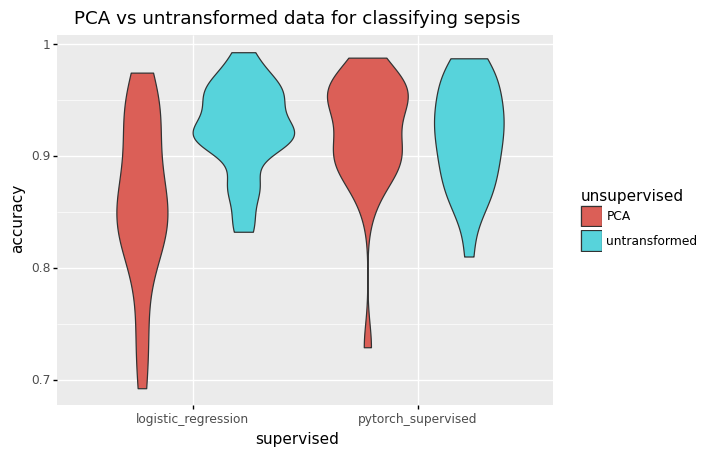

<ggplot: (8744478377620)>


In [4]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

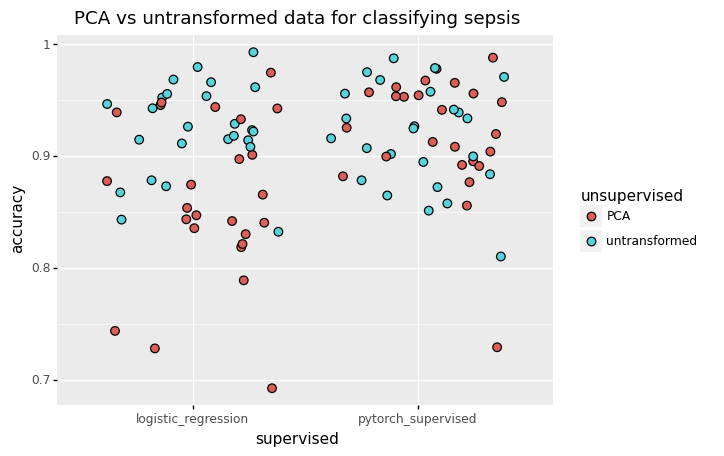

<ggplot: (8744473819043)>


In [5]:
plot = ggplot(sepsis_metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=3)
plot += ggtitle('PCA vs untransformed data for classifying sepsis')
print(plot)

## All labels

In [6]:
in_files = glob.glob('../../results/all_labels.*')
print(in_files[:5])

['../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.0.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.4.tsv', '../../results/all_labels.pytorch_supervised.refinebio_labeled_dataset.1.tsv', '../../results/all_labels.PCA.pytorch_supervised.refinebio_labeled_dataset.4.tsv', '../../results/all_labels.PCA.logistic_regression.refinebio_labeled_dataset.1.tsv']


In [7]:
metrics = None
for path in in_files:
    if metrics is None:
        metrics = pd.read_csv(path, sep='\t')
        
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        metrics['unsupervised'] = unsupervised_model
        metrics['supervised'] = supervised_model
    else:
        new_df = pd.read_csv(path, sep='\t')
        model_info = path.strip('.tsv').split('all_labels.')[-1]
        model_info = model_info.split('.')
        
        if len(model_info) == 4:
            unsupervised_model = model_info[0]
            supervised_model = model_info[1]
        else:
            unsupervised_model = 'untransformed'
            supervised_model = model_info[0]
             
        new_df['unsupervised'] = unsupervised_model
        new_df['supervised'] = supervised_model
        
        metrics = pd.concat([metrics, new_df])

metrics

,accuracy,train studies,train sample count,unsupervised,supervised
0,0.120998,"GSE112811,GSE55201,GSE64457,GSE40240,GSE13904,...",8391,PCA,logistic_regression
1,0.044194,"GSE112811,GSE55201,GSE64457,GSE40240,GSE39088,...",8107,PCA,logistic_regression
2,0.010417,"GSE55201,GSE40240,GSE39088,GSE13904,GSE33118,G...",8122,PCA,logistic_regression
3,0.002366,"GSE112811,GSE55201,GSE64457,GSE40240,GSE39088,...",7698,PCA,logistic_regression
4,0.012376,"GSE112811,GSE64457,GSE39088,GSE21592,GSE79150,...",8618,PCA,logistic_regression
...,...,...,...,...,...
0,0.002183,"GSE65088,GSE21592,GSE19491,GSE37171,GSE93606,G...",8402,untransformed,logistic_regression
1,0.070588,"GSE65088,GSE21592,GSE19491,GSE37171,GSE45291,G...",8109,untransformed,logistic_regression
2,0.053706,"GSE65088,GSE19491,GSE37171,GSE93606,GSE14882,G...",7981,untransformed,logistic_regression
3,0.017518,"GSE21592,GSE93606,GSE14882,GSE45291,GSE33119,G...",8864,untransformed,logistic_regression


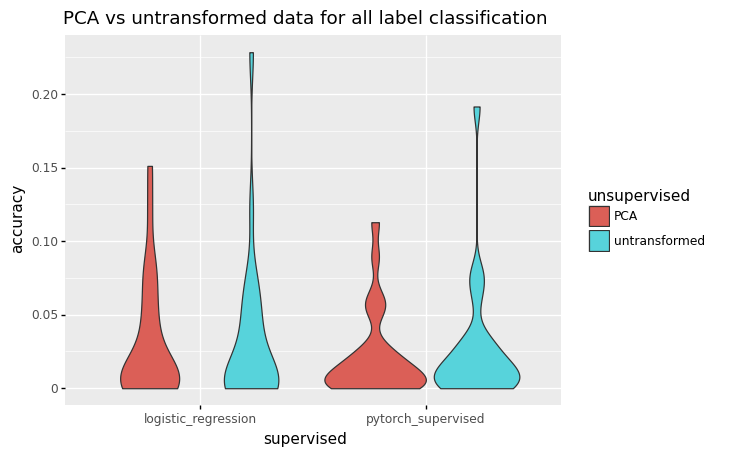

<ggplot: (8744478377635)>


In [8]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_violin()
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)

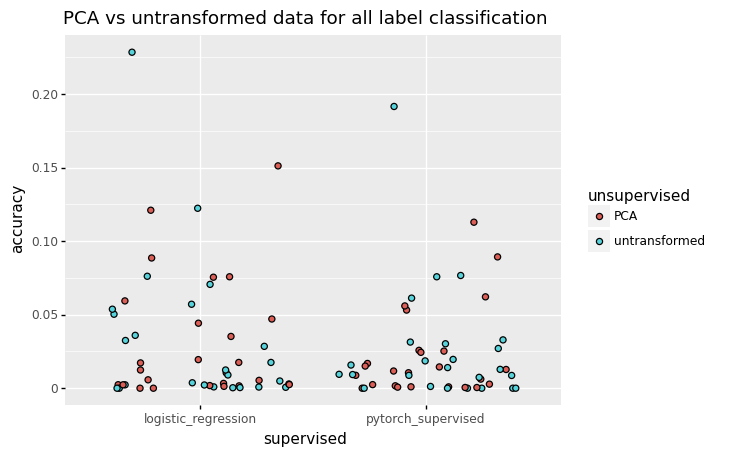

<ggplot: (8744473876089)>


In [9]:
plot = ggplot(metrics, aes(x='supervised', y='accuracy', fill='unsupervised')) 
plot += geom_jitter(size=2)
plot += ggtitle('PCA vs untransformed data for all label classification')
print(plot)